In [6]:
import numpy as np
import base64
import pandas as pd
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn import ensemble, metrics, model_selection, naive_bayes
from sklearn.decomposition import NMF, LatentDirichletAllocation
from matplotlib import pyplot as plt
get_ipython().magic(u'matplotlib inline')
from gensim import corpora, models, similarities
import random
from collections import Counter
from __future__ import division
import re
import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
# nltk.download('popular')
stop_words = stopwords.words('german')
%matplotlib inline
import gensim
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
print "all imports worked nicely"
import os
import tensorflow as tf
import numpy as np
# import fasttext
from tensorflow.contrib.tensorboard.plugins import projector
from tqdm import tqdm

all imports worked nicely


In [10]:
# Word Vectors
# load the GloVe vectors in a dictionary:

# embeddings_index = {}
# f = open('/home/D072852/glove.840B.300d.txt')
# for line in tqdm(f):
#     values = line.split()
#     word = values[0]
#     coefs = np.asarray(values[1:], dtype='float32')
#     embeddings_index[word] = coefs
# f.close()

# print('Found %s word vectors.' % len(embeddings_index))

embeddings_index_de = {}
f = open('/home/D072852/wiki.de.vec')
for line in tqdm(f):
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index_de[word] = coefs
f.close()

print('Found %s word vectors.' % len(embeddings_index_de))

# Or the model could be loaded in this way using Gensim functions:
# model_wiki_de = gensim.models.KeyedVectors.load_word2vec_format("wiki.de.vec", binary=False)

In [32]:
# working with embeddings from source https://devmount.github.io/GermanWordEmbeddings/
# get trained model
# model = gensim.models.KeyedVectors.load_word2vec_format("german.model", binary=True)
print "model data loaded sucessfully.."
def draw_words(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word] for word in words]
#     vectors = []
#     for word in words:
#         if word in model:
#             vectors.append(model[word])
    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()
    


model data loaded sucessfully..


In [73]:
# len(embeddings_index_de)
i = 4
for key, value in model.vocab.iteritems() :
    if "Indien" in key:
        print key
#     print len(embeddings_index_de[key])
#     print embeddings_index_de[key]
#     i = i-1
#     if i<1:
#         break
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
# # words  = ["Athen","Griechenland","Berlin","Deutschland","Ankara","Tuerkei","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# # words = ["ftdna","tiergartenviertels","soestdijk","panikartiger"]
# for key in words:
#     if key.lower() in embeddings_index_de:
#         print key, embeddings_index_de[key.lower()]
#     else:
#         print key + " key(s) not present in dictionary"

offizielle_Indienststellung
Indien_Indonesien
Indien_Persien
Persien_Indien
Indienreise
Nordosten_Indiens
Portugiesisch-Indien
Studentin_Indien
Indien
Indien_Burma
Indienststellung_erfolgte
Hyderabad_Indien
Vergewaltigungen_Indien
Mumbai_Indien
Vizekoenig_Indien
Generalgouverneur_Niederlaendisch-Indien
Gruppenvergewaltigung_Indien
Fuerstenstaat_Britisch-Indiens
Seeweg_Indien
Niederlaendisch-Indiens
Unabhaengigkeit_Indiens
Osten_Indiens
Indien_Tibet
Teilung_Indiens
Vergewaltigung_Indien
Teilen_Indiens
ausserhalb_Indiens
Bau_Indienststellung
Indien_Ceylon
Indien_Nepal
Neu-Delhi_Indien
Britisch-Indien_†
Indienststellung
China_Indien
Indien_China
Norden_Indiens
Indien_Suedostasien
Indienststellung_Kapitaenleutnant
Pakistan_Indien
Britisch-Indiens
Indienrat
Indienstnahme
Indien_Sri
Bangalore_Indien
Britisch-Indien
Indienststellung_Oberleutnant
Nordwesten_Indiens
Afrika_Indien
Goa_Indien
Indien_Bangladesch
Kalkutta_Indien
Pune_Indien
Nepal_Indien
Chennai_Indien
Indien_Pakistan
Indiens
Nieder

In [12]:
# get trained model
model02 = gensim.models.KeyedVectors.load_word2vec_format("GER64", binary=False)
# model03 = gensim.models.KeyedVectors.load("de.bin")
# gensim --V

In [15]:
# ------------------EVALUATING different word embeddings ------------------------------------------------------------------
# Checking the vocabulary size for different embeddings
# print len(word_vectors.vocab)
print len(model_wiki_de.vocab)
print len(model02.vocab)
print len(model.vocab)

model_wordList = model.index2word
print type(model_wordList), len(model_wordList)
print model_wordList[:50]
# model.vocab gives you a dictionary sort of embedding_index_de
# print type(word_vectors.vocab)
# fasttext_wordList = word_vectors.index2word
fasttext_wordList = model_wiki_de.index2word
print type(fasttext_wordList), len(fasttext_wordList)
print fasttext_wordList[:50]

ger64_wordList = model02.index2word
print type(ger64_wordList), len(ger64_wordList)
print ger64_wordList[:50]

# googleNeg_wordList = model03.index2word
# print type(googleNeg_wordList), len(googleNeg_wordList)
# print googleNeg_wordList[:50]


# plot currencies
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","britische_Pfund","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna"]
# draw_words(model, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

# words = ["Schweiz","Franken","Deutschland","Euro","Japan","Yen","Russland","Rubel","USA","US-Dollar","Kroatien","Kuna","Indien", "Rupee"]
# draw_words(model02, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')

# model.doesnt_match("wurst senf brezn apfel".split())
# model02.doesnt_match("wurst senf brezn apfel".split())

# words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]
# words  = ["Athen","Griechenland","Berlin","Deutschland","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# draw_words(model, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')
# draw_words(model02, words, True, True, True, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')


2275233
2001952
608130
<type 'list'> 608130
[u'Die', u'fuer', u'wurde', u'Der', u'dass', u'Das', u'ueber', u'In', u'Im', u'wurden', u'Er', u'Sie', u'Jahr', u'mehr', u'zwei', u'Es', u'Nach', u'sowie', u'ab', u'Jahren', u'Jahre', u'sei', u'Am', u'beim', u'drei', u'seit', u'koennen', u'schon', u'Euro', u'Stadt', u'Mit', u'ersten', u'Ein', u'Auch', u'gibt', u'etwa', u'bereits', u'jedoch', u'Zeit', u'immer', u'Uhr', u'Als', u'Bei', u'1', u'Ende', u'heute', u'Fuer', u'sagte', u'Von', u'konnte']
<type 'list'> 2275233
[u'.', u',', u'</s>', u'-', u'der', u')', u'die', u'(', u'und', u'in', u'von', u"'", u'den', u'im', u'das', u'des', u'mit', u'ist', u'er', u'zu', u'f\xfcr', u'auf', u'ein', u'als', u'dem', u'eine', u'wurde', u'\u2013', u'auch', u'sich', u'nicht', u'an', u'es', u'nach', u'war', u'bei', u'aus', u'rd', u'am', u'sie', u'cest', u'bis', u'"', u'ich', u'einer', u'zum', u'werden', u'sind', u'oder', u'wird']
<type 'list'> 2001952
[u'</s>', u'.', u',', u'der', u'die', u'und', u'in', u"''",

In [5]:
# load model
# word2vec = fasttext.load_model('wiki.en.bin')

# create a list of vectors
# embedding = np.empty((len(word2vec.words), word2vec.dim), dtype=np.float32)
# for i, word in enumerate(word2vec.words):
#     embedding[i] = word2vec[word]

# embedding = np.empty((len(embeddings_index), 300), dtype=np.float32)
# i = 0
# for key, value in embeddings_index.iteritems() :
#     embedding[i] = value
#     i = i+1

embedding_de = np.empty((len(embeddings_index_de), 300), dtype=np.float32)
i = 0
for key, value in embeddings_index_de.iteritems() :
    embedding_de[i] = value
    i = i+1

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.Variable([0.0], name='embedding_de')
place = tf.placeholder(tf.float32, shape=embedding_de.shape)
set_x = tf.assign(X, place, validate_shape=False)
sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: embedding_de})

# write labels
with open('/home/D072852/log/metadata_de.tsv', 'w') as f:
    for key in embeddings_index_de.iteritems() :
        f.write(key[0] + '\n')

# create a TensorFlow summary writer
summary_writer = tf.summary.FileWriter('/home/D072852/log', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
embedding_conf.tensor_name = 'embedding_de:0'
embedding_conf.metadata_path = os.path.join('/home/D072852/log', 'metadata_de.tsv')
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, os.path.join('/home/D072852/log', "model_de.ckpt"))

'/home/D072852/log/model_de.ckpt'

In [17]:
# Setting up word embeddings to be visualized in Tensor Board - 
# load model
# word2vec = fasttext.load_model('wiki.en.bin')

# create a list of vectors
embedding = np.empty((len(model02.vocab), 64), dtype=np.float32)
for i, word in enumerate(model02.vocab):
    embedding[i] = model02[word]

# setup a TensorFlow session
tf.reset_default_graph()
sess = tf.InteractiveSession()
X = tf.Variable([0.0], name='embedding')
place = tf.placeholder(tf.float32, shape=embedding.shape)
set_x = tf.assign(X, place, validate_shape=False)
sess.run(tf.global_variables_initializer())
sess.run(set_x, feed_dict={place: embedding})

# write labels, creating a meta file -
with open('/home/D072852/log/metadata_de_model02.tsv', 'w') as f:
    for key in model02.vocab.iteritems() :
        f.write(key[0].encode('utf-8') + '\n')

# create a TensorFlow summary writer
summary_writer = tf.summary.FileWriter('/home/D072852/log', sess.graph)
config = projector.ProjectorConfig()
embedding_conf = config.embeddings.add()
embedding_conf.tensor_name = 'embedding:0'
embedding_conf.metadata_path = os.path.join('/home/D072852/log', 'metadata_de_model02.tsv')
projector.visualize_embeddings(summary_writer, config)

# save the model
saver = tf.train.Saver()
saver.save(sess, os.path.join('/home/D072852/log', "model_de_model02.ckpt"))

'/home/D072852/log/model_de_model02.ckpt'

In [19]:
# Function to visualize 2D vectors using PCS/Tsne
# function draw_words
# ... reduces dimensionality of vectors of given words either with PCA or with t-SNE and draws the words into a diagram
# @param word2vec model     to visualize vectors from
# @param list     words     list of word strings to visualize
# @param bool     pca       use PCA (True) or t-SNE (False) to reduce dimensionality 
# @param bool     alternate use different color and label align for every second word
# @param bool     arrows    use arrows to connect related words (items that are next to each other in list)
# @param float    x1        x axis range (from)
# @param float    x2        x axis range (to)
# @param float    y1        y axis range (from)
# @param float    y2        y axis range (to)
# @param string   title     for diagram
def draw_words_fasttext(model, words, pca=False, alternate=True, arrows=True, x1=3, x2=3, y1=3, y2=3, title=''):
    # get vectors for given words from model
    vectors = [model[word.lower()] for word in words]

    if pca:
        pca = PCA(n_components=2, whiten=True)
        vectors2d = pca.fit(vectors).transform(vectors)
    else:
        tsne = TSNE(n_components=2, random_state=0)
        vectors2d = tsne.fit_transform(vectors)

    # draw image
    plt.figure(figsize=(6,6))
    if pca:
        plt.axis([x1, x2, y1, y2])

    first = True # color alternation to divide given groups
    for point, word in zip(vectors2d , words):
        # plot points
        plt.scatter(point[0], point[1], c='r' if first else 'g')
        # plot word annotations
        plt.annotate(
            word, 
            xy = (point[0], point[1]),
            xytext = (-7, -6) if first else (7, -6),
            textcoords = 'offset points',
            ha = 'right' if first else 'left',
            va = 'bottom',
            size = "x-large"
        )
        first = not first if alternate else first

    # draw arrows
    if arrows:
        for i in xrange(0, len(words)-1, 2):
            a = vectors2d[i][0] + 0.04
            b = vectors2d[i][1]
            c = vectors2d[i+1][0] - 0.04
            d = vectors2d[i+1][1]
            plt.arrow(a, b, c-a, d-b,
                shape='full',
                lw=0.1,
                edgecolor='#bbbbbb',
                facecolor='#bbbbbb',
                length_includes_head=True,
                head_width=0.08,
                width=0.01
            )

    # draw diagram title
    if title:
        plt.title(title)

    plt.tight_layout()
    plt.show()

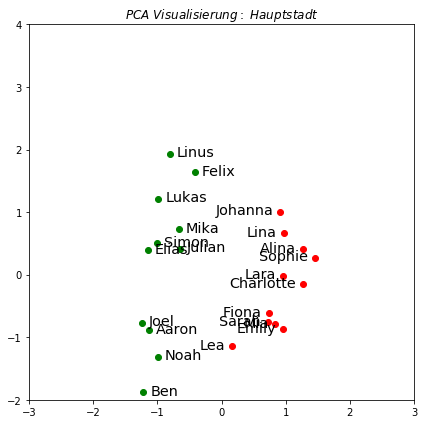

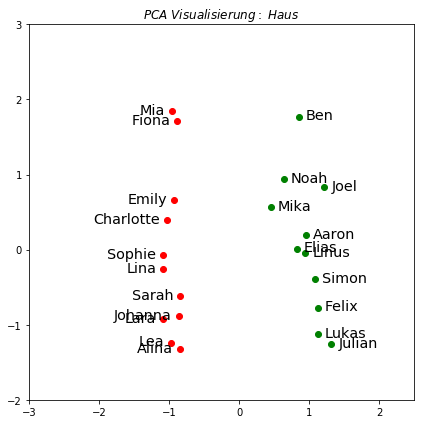

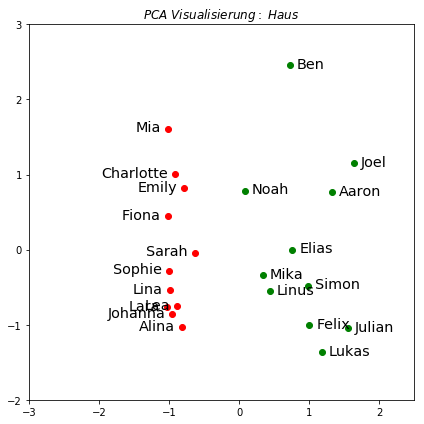

In [88]:
# plot currencies
# words = ["Schweiz","Franken","Deutschland","Euro","Grossbritannien","pund/pfund","Japan","Yen","Russland","Rubel","USA","usdollar","Kroatien","Kuna","Indien", "Rupee"]
# words  = ["Athen","Griechenland","Berlin","Deutschland","Bern","Schweiz","Hanoi","Vietnam","Lissabon","Portugal","Moskau","Russland","Stockholm","Schweden","Tokio","Japan","Washington","USA"]
# words = ["Deutschland","Deutsch","USA","Englisch","Griechenland","Griechisch","Norwegen","Norwegisch","Schweden","Schwedisch","Polen","Polnisch","Ungarn","Ungarisch"]
words = ["Alina","Aaron","Charlotte","Ben","Emily","Elias","Fiona","Felix","Johanna","Joel","Lara","Julian","Lea","Linus","Lina","Lukas","Mia","Mika","Sarah","Noah","Sophie","Simon"]

# draw_words(embeddings_index_de, words, True, True, True, -3, 3, -2, 6, r'$PCA\ Visualisierung:\ W\ddot{a}hrung$')
draw_words_fasttext(embeddings_index_de, words, True, True, False, -3, 3, -2, 4, r'$PCA\ Visualisierung:\ Hauptstadt$')
draw_words(model, words, True, True, False, -3, 2.5, -2, 3, r'$PCA\ Visualisierung:\ Haus$')
draw_words(model02, words, True, True, False, -3, 2.5, -2, 3, r'$PCA\ Visualisierung:\ Haus$')


In [7]:
from gensim.models import KeyedVectors
word_vectors = KeyedVectors.load_word2vec_format('/home/D072852/wiki.de.vec', binary=False)  # C text format
# word_vectors01 = KeyedVectors.load_word2vec_format('/home/D072852/wiki.de.bin', binary=True)  # C binary format
# word_vectors.save('/home/D072852/word_vectors_fbDE')
# word_vectors01 = KeyedVectors('/home/D072852/word_vectors_fbDE')
# print word_vectors01
# word_vectors01.cosine_similarities('frau','mann')

[(u'kindern', 0.796553373336792), (u'enkelkinder', 0.7761600017547607), (u'#kinder', 0.7728991508483887), (u'\xbbkinder', 0.7651199102401733), (u'kleinkinder', 0.7651147842407227), (u'enkelkindern', 0.7576228976249695), (u'kindeskinder', 0.7451964616775513), (u'urenkelkinder', 0.7424343824386597), (u'einzelkinder', 0.7415428757667542), (u'kinder/jugendliche', 0.7330327033996582)]


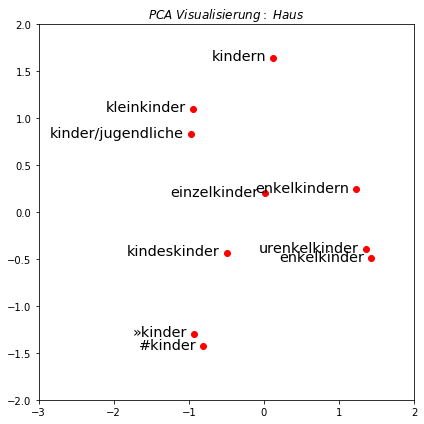

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'koenige', 0.9254183769226074),
 (u'koenigin', 0.9117095470428467),
 (u'koenigi', 0.8989173173904419),
 (u'bkoenig', 0.8936635851860046),
 (u'erlkoenig', 0.8904488682746887),
 (u'koenigs', 0.8678578734397888),
 (u'koeniger', 0.8672288060188293),
 (u'koenigl', 0.8639868497848511),
 (u'koenigsfeld', 0.8413063883781433),
 (u'heussner', 0.8398495316505432)]

In [8]:
# word_vectors.wv.similarity('frau', 'man')
matches = word_vectors.most_similar(positive=["kinder"], negative=[], topn=10)
print matches
words = [match[0] for match in matches]
draw_words_fasttext(word_vectors, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')
word_vectors.wv.most_similar_cosmul(positive=['frau', 'koenig'], negative=['mann'])

In [89]:
# Kerze + Feuerzeug = brennende_Kerze
# plot related words to 'house'
matches = model.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
# draw_words(model, words, True, False, False, -3, 2, -2, 2, r'$PCA\ Visualisierung:\ Haus$')

print model.wv.most_similar_cosmul(positive=['Frau', 'Koenig'], negative=['Mann'])
print model.wv.most_similar_cosmul(positive=['Obama', 'Russland'], negative=['USA'])
print model.wv.most_similar_cosmul(positive=['Kerze', 'Feuerzeug'])

matches = model02.most_similar(positive=["Haus"], negative=[], topn=10)
words = [match[0] for match in matches]
# draw_words(model02, words, True, False, False, -3, 2, -2, 3, r'$PCA\ Visualisierung:\ Haus$')
# model02.wv.most_similar_cosmul(positive=['Frau', 'Koenig'], negative=['Mann'])
model02.wv.most_similar_cosmul(positive=['Obama', 'Russland'], negative=['USA'])
# model02.wv.most_similar_cosmul(positive=['Kerze', 'Feuerzeug'])


/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:8: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'Koenigin', 0.9604154229164124), (u'Prinzessin', 0.9353479743003845), (u'Jungschuetzenkoenigin', 0.9134642481803894), (u'Prinz', 0.9023544788360596), (u'Regentin', 0.8993106484413147), (u'Schuetzenkoenigin', 0.8981477618217468), (u'Erntekoenigin', 0.8974709510803223), (u'Majestaet', 0.8957144618034363), (u'Carl_XVI', 0.8947470784187317), (u'Kaiserin', 0.8943732380867004)]
[(u'Putin', 0.958625316619873), (u'US-Praesident_Obama', 0.9078115820884705), (u'Russlands_Staatschef', 0.9003347158432007), (u'Wladimir_Putin', 0.8979545831680298), (u'russischen_Praesidenten', 0.8963831067085266), (u'Barack_Obama', 0.8915544152259827), (u'Kremlchef_Wladimir', 0.8879683613777161), (u'Russlands_Praesident', 0.8851548433303833), (u'US-Aussenminister_Kerry', 0.8814014792442322), (u'US-Praesident_Barack', 0.8757230639457703)]
[(u'brennende_Kerze', 0.7145116925239563), (u'Herdplatte', 0.710566520690918), (u'brennende_Zigarette', 0.6972489356994629), (u'Teelicht', 0.6950814127922058), (u'Grablicht', 0.6

/home/D072852/anaconda/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:15: DeprecationWarning:

Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).



[(u'Putin', 1.0135201215744019),
 (u'Poroschenko', 1.008687973022461),
 (u'Jazenjuk', 0.9955540895462036),
 (u'Biden', 0.9941121339797974),
 (u'Janukowitsch', 0.991157591342926),
 (u'Medwedjew', 0.9903573989868164),
 (u'Medwedew', 0.9889391660690308),
 (u'Karsai', 0.987220287322998),
 (u'Assad', 0.9869939684867859),
 (u'Kerry', 0.9860815405845642)]

In [99]:
# data input and processing
# data input and processing
train = pd.read_csv("/home/D072852/Thalia_data/thalia.csv", sep='|', nrows=30000)
train = train.iloc[:, :-1]
train.drop(train.columns[0], axis=1, inplace=True)
print("Number of rows, columns in train dataset : ",train.shape)
print train.columns
# print train.head
print train.dtypes
train.head(2)

print "Before removing the duplicates\n", train['ADDITIONALTEXT'].describe()
# dropping the rows with duplicate values in Additional text field -
train.drop_duplicates(subset='ADDITIONALTEXT', keep="first", inplace=True)
print "AFTER removing the duplicates\n", train['ADDITIONALTEXT'].describe()
# train['THEME'].describe()
# print train['ADDITIONALTEXT'].nunique()
# train['ADDITIONALTEXT']
train.head(10)
# print train['THEME'].describe()
# df['preTestScore'].groupby(df['regiment']).describe()
# train['ADDITIONALTEXT'].groupby(train['THEME']).describe()
# train['ADDITIONALTEXT'].groupby(train['THEME']).head(5)
# group_data.head(5)

('Number of rows, columns in train dataset : ', (30000, 10))
Index([u'MATNR', u'ARTIDENTNO', u'ADDITIONALTEXT', u'RATING', u'RATINGTITEL',
       u'RATINGTEXT', u'RATEDAT', u'SCHLAGWORT', u'CATEGORY', u'THEME'],
      dtype='object')
MATNR             object
ARTIDENTNO         int64
ADDITIONALTEXT    object
RATING             int64
RATINGTITEL       object
RATINGTEXT        object
RATEDAT           object
SCHLAGWORT        object
CATEGORY          object
THEME             object
dtype: object
Before removing the duplicates
count                                                 30000
unique                                                  611
top       <p>Erstens kommt es anders &amp;#8230;</p><p>V...
freq                                                   1248
Name: ADDITIONALTEXT, dtype: object
AFTER removing the duplicates
count                                                   611
unique                                                  611
top       <p>Dies ist die Geschichte einer ma

,MATNR,ARTIDENTNO,ADDITIONALTEXT,RATING,RATINGTITEL,RATINGTEXT,RATEDAT,SCHLAGWORT,CATEGORY,THEME
0,A1026834633,33669870,PECUNIA<br>Der Versicherungs-Ratgeber von Dirk...,50,sehr gutes buch,Dieses Werk hat mir sehr geholfen bei meiner E...,08.12.12 15:57,Kartonierter Einband (Kt),mainsubject,Selbsthilfe und Persönlichkeitsentwicklung
20,A1022787682,32054271,Hündchen Bello möchte krähen können wie Hahn K...,50,Kindheitserinnerungen...,Was habe ich die Geschichten ums Entlein Schna...,06.07.12 11:42,Audio CD (CD/SACD) (CD),mainsubject,"Kinder/Jugendliche: Romane, Erzählungen, Tatsa..."
27,A1030481443,35358198,<p>Hana verliebt sich in einen mysteriösen jun...,50,Wolf oder Mensch?,Ame & Yuki  Die Wolfskinder ist eine wunder...,16.12.14 13:01,Kartonierter Einband (Kt),mainsubject,Manga: Shojo
35,A1029053070,34461069,"Vampir, Werwolf und Dämonin &amp;#8211; mit di...",40,Zufriedenstellendes Ende der Trilogie,Nach den Ereignissen in Göttin der Finsternis...,25.11.16 15:09,Kartonierter Einband (Kt),subject,"Fantasy (Romance, Dark Romance)"
71,A1038964023,44807019,"Was tun, wenn ein Baum plötzlich Bonbonfrüchte...",50,Wenn Du auf einen Bonbonbaum triffst...,Kurzbeschreibung\nWas würde passieren wenn ihr...,22.05.16 09:00,Fester Einband,subject,Kinder/Jugendliche: Lustige Romane
91,A1020288803,30809711,<p>Brauchen Sie eine kleine Erfrischung? Haben...,50,Eiscreme,Leckeres Eis und Milchshakes selber machen kli...,06.05.13 18:38,Fester Einband,subject,Kochen: Desserts
316,A1037783195,43862745,<p>Eine Methodengeschichte psychologischer For...,50,Methodengeschichte psychologischer Forschung u...,"Von Sternen, Fröschen und Monaden  wie man de...",08.09.17 13:48,Kartonierter Einband (Kt),mainsubject,"Ratgeber, Sachbuch: Psychologie"
332,A1014446928,24574132,Winter 1947 in Hohenschöpping im Havelland. Dr...,50,Jora und Knopotschka,Hohenschöpping im Havelland im Winter 1947. Ei...,19.10.10 17:47,Fester Einband,mainsubject,Geschichte
344,A1010991253,19910830,Das Zimmer Rumpelkammer ist einer der Wohnräum...,50,"Bravo, ein im wahrsten Sinne lebendiges Kinder...",Ich habe lange nach dem richtigen Buch für mei...,27.03.10 22:28,Kartonierter Einband (Kt),mainsubject,"Kinder/Jugendliche: Romane, Erzählungen, Tatsa..."
345,A1034729376,40940039,Mit seiner landschaftlichen Schönheit und sage...,50,Michael Lange - Fluss,"Michael Lange - Fluss\n\nDer Rhein, deutscher ...",16.06.15 13:49,Fester Einband,mainsubject,Fotografie
